# Ejercicios

Completa los siguientes ejercicios utilizando lo que hemos aprendido hasta y los datos del directorio ejercicios/:

1. Queremos ver los datos de las acciones de Facebook, Apple, Amazon, Netflix y Google (FAANG), pero nos dieron cada uno como un archivo CSV separado. Combínelos en un único archivo y guarde el dataframe de los datos FAANG como faang para el resto de los ejercicios:



In [ ]:
# a) Crea la carpeta faang. Mueve los archivos aapl.csv, amzn.csv, fb.csv, goog.csv y nflx.csv a dicha carpeta
# Lee los archivos usando un bucle
import os
import shutil
os.makedirs("faang", exist_ok=True)


In [ ]:
for f in ["aapl.csv", "amzn.csv", "fb.csv", "goog.csv", "nflx.csv"]:
    shutil.move(f, f"faang/{f}")

In [ ]:
# Esta también funciona
#for f in ["aapl.csv", "amzn.csv", "fb.csv", "goog.csv", "nflx.csv"]:
#    shutil.move(f, "faang")

In [ ]:
"fb.csv".split(".")[0]

In [ ]:
lista = []
import pandas as pd
for file in os.listdir("faang"):
    tmp = pd.read_csv(f"faang/{file}")
    tmp["ticker"] = file.split(".")[0]
    lista.append(tmp)


In [ ]:
faang = pd.concat(lista)

In [ ]:
faang.to_csv("faang.csv")

In [ ]:
#b) Añade una columna a cada dataframe, llamalo ticker, indicando el símbolo del ticker al que corresponde (el de Apple es AAPL, por ejemplo);

In [ ]:
#c) Agréguelos en un dataframe.


In [ ]:
#d) Guarda el resultado en un archivo CSV llamado faang.csv.

In [ ]:
faang["open"].max()

In [ ]:
faang[faang["open"]==faang["open"].max()]

In [ ]:
faang.groupby(["ticker"])["open"].max()

In [ ]:
faang["mayor_100"] = faang["open"].apply(lambda x: x>=100)

In [ ]:
def mayor_100(x):
    return x>=100
faang["mayor_100_bis"] = faang["open"].apply(mayor_100)

In [ ]:
def filtrado(x):
    if x<=50:
        return "Entre 0 y 50"
    elif 50<x<=100:
        return "Entre 51 y 100"
    elif 100<x<=1000:
        return "Entre 101 y 1000"
    else:
        return "Más de 1000"
faang["filtro_Valor"] = faang["open"].apply(filtrado)

In [ ]:
faang["dist_media"] = faang.groupby("ticker")["open"].transform(lambda x: x - x.mean())

In [ ]:
medias = faang.groupby(["ticker"], as_index=False)["open"].mean()

In [ ]:
medias.rename(columns={"open":"media"}, inplace=True)

In [ ]:
faang["mim_max"] = faang.groupby("ticker")["open"].transform(lambda x: (x - x.min())/(x.max()-x.min()))

In [ ]:
faang.groupby("ticker")["mim_max"].describe()

In [ ]:
medias.columns =["ticker", "media"]

In [ ]:
medias

In [ ]:
faang.groupby(["ticker"])[["open"]].mean()

In [ ]:
faang2 = pd.merge(faang, medias, on=["ticker"], how="outer", indicator=True)

In [ ]:
faang2["dist_media_2"] = faang2["open"] - faang2["media"]

In [ ]:
sum(faang2["dist_media_2"] != faang2["dist_media"])

Calcula la normalización min-max para cada ticker de los faang

In [ ]:
import pandas as pd
faang = pd.read_csv("faang.csv")
faang["open_min_max"] = faang.groupby("ticker")["open"].transform(lambda x: (x - x.min())/(x.max()-x.min()))

In [ ]:
faang.groupby("ticker")["open_min_max"].describe()

Calcula una columna que sea "Sube" si el valor de close era superior al de open y "Baja" en caso contrario

In [ ]:
def genera_sube_baja(open,close):
    if open>=close:
        return "Baja"
    else:
        return "Sube"
faang["sube_baja"] = faang.apply(lambda x: genera_sube_baja(x["open"], x["close"]), axis = 1)

In [ ]:
faang["sube_baja_2"] =  faang["close"] > faang["open"]

In [ ]:
faang["sube_baja_2"] = faang["sube_baja_2"].map({True: "Sube", False:"Baja"})

In [ ]:
sum(faang["sube_baja_2"]  != faang["sube_baja"])

2. Con faang, utilice la conversión de tipos para convertir los valores de la columna de fecha en datetime y la columna de volumen en números enteros. A continuación, ordena por fecha y ticker.


In [ ]:
faang = pd.read_csv("faang.csv")
faang['date'] = pd.to_datetime(faang['date'])
faang["volume"] = faang["volume"].astype(int)

El csv tipo_cambio contiene los tipos de cambio entre USD y EUR para el 2018 (datos inventados). 
Añade la fecha para cada día del año

In [ ]:
tipo_cambio = pd.read_csv("tipo_cambio.csv")
tipo_cambio = tipo_cambio[["USD_EUR"]]

In [ ]:
tipo_cambio["divisa"]  = "$/€"

In [ ]:
tipo_cambio["fecha"] = pd.date_range("2018-01-01", "2018-12-31", freq="D")

In [ ]:
faang.head()

Convierte la columna low de faang a euro usando merge

In [ ]:
faang_merge = pd.merge(faang, tipo_cambio, left_on=["date"], right_on=["fecha"], how="outer", indicator=True)

In [ ]:
faang_merge["weekday"] = faang_merge["fecha"].dt.day_name()

In [ ]:
faang_merge[faang_merge["_merge"]!="both"].groupby(["weekday"])["weekday"].count()

In [ ]:
faang_merge[(faang_merge["_merge"]!="both") & (~faang_merge["weekday"].isin(["Saturday", "Sunday"]))]["fecha"]

In [ ]:
faang_ = faang.set_index("date")

In [ ]:
tipo_cambio_ = tipo_cambio.set_index("fecha")

In [ ]:
faang_merge_2 = pd.merge(faang_, tipo_cambio_, left_index=True, right_index=True, how="outer", indicator=True) 

In [ ]:
faang_merge.dropna(inplace=True)

In [ ]:
faang_merge["low_euro"] = faang_merge["low"]*faang_merge["USD_EUR"]

In [ ]:
faang_merge

In [ ]:
sum(faang_merge["low_euro_2"] !=faang_merge["low_euro"])

Convierte la columna low de faang a euro usando apply

In [ ]:
def tipo_cambio_2(fecha, low):
    return tipo_cambio[tipo_cambio["fecha"]==fecha]["USD_EUR"].values[0]*low
faang["low_euro_3"] = faang[["date", "low"]].apply(lambda x: tipo_cambio_2(x["date"], x["low"]), axis=1)

In [ ]:
faang["low_euro_2"] = faang[["date", "low"]].apply(lambda x: tipo_cambio[tipo_cambio["fecha"]==x["date"]]["USD_EUR"].values[0]*x["low"], axis=1)

3. Encuentre las siete filas en faang con el valor más bajo para el volumen.


In [ ]:
faang.sort_values("volume", inplace=True)
faang.head(7)

4. El Centro Europeo para la Prevención y el Control de las Enfermedades (ECDC) proporciona un conjunto de datos abierto sobre casos de COVID-19 denominado número diario de nuevos casos notificados de COVID-19 por país en todo el mundo (https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographicdistribution-covid-19-cases-worldwide). Este conjunto de datos se actualiza diariamente, pero utilizaremos una instantánea que contiene datos desde el 1 de enero de 2020 hasta el 18 de septiembre de 2020. Limpia y pivota los datos para que estén en formato ancho:



In [ ]:
#- a) Lea el archivo covid19_cases.csv.
covid19 = pd.read_csv("covid19_cases.csv")
covid19.head()

In [ ]:
#- b) Cree una columna de fecha utilizando los datos de la columna dateRep y la función pd.to_datetime().
covid19["fecha"] = pd.to_datetime(covid19["dateRep"], dayfirst=True)

In [183]:
from dateutil import parser
covid19 = pd.read_csv("covid19_cases.csv")
covid19["fecha"] = covid19["dateRep"].apply(lambda x: parser.parse(x))

In [184]:
#- c) Establece la columna de fecha como índice y ordena el índice.
covid19.set_index("fecha", inplace=True)

In [185]:
covid19.sort_index(inplace=True)

In [186]:
#- d) Sustituye todas las apariciones de United_States_of_America y United_Kingdom por USA y UK, respectivamente. 
# Sugerencia: el método replace() puede ejecutarse en todo el dataframe.
covid19["countriesAndTerritories"] = covid19["countriesAndTerritories"].replace("United_States_of_America", "USA")
covid19["countriesAndTerritories"] = covid19["countriesAndTerritories"].replace("United_Kingdom", "UK")

In [197]:
#- e) Utilizando la columna countriesAndTerritories, filtre los datos de casos COVID-19 depurados hasta Argentina, Brasil, China, Colombia, India, Italia, México, Perú, Rusia, España, Turquía, Reino Unido y Estados Unidos.
paises = "Argentina, Brazil, China, Colombia, India, Italy, Mexico, Peru, Russia, Spain, Turkey, UK, USA"
lista_paises = paises.split(", ")

In [201]:
covid19[covid19["countriesAndTerritories"].isin(lista_paises)].head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
fecha,,,,,,,,,,,,
2020-01-01,01/01/2020,1,1,2020,0,0,Russia,RU,RUS,1.458723e+08,Europe,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,UK,UK,GBR,6.664711e+07,Europe,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,Brazil,BR,BRA,2.110495e+08,America,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,Italy,IT,ITA,6.035955e+07,Europe,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,India,IN,IND,1.366418e+09,Asia,NaN


In [ ]:
#- f) Pivota los datos de modo que el índice contenga las fechas, las columnas contengan los nombres de los países y los valores sean los recuentos de casos (la columna de casos). 
# Asegúrate de rellenar los valores NaN con 0.

5. Intenta obtener el csv covid19_total_cases.csv a partir de covid19_cases.csv

In [204]:
covid19_total = pd.read_csv("covid19_total_cases.csv")
covid19_total

,index,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
0,cases,38919,12073,49413,1564,3789,3,95,601700,46910,...,509,1242,1890,50253,65174,1068,766,2024,14022,7647


Basado en hechos reales (Iván Vallés) aunque los datos eran diferentes
En este archivo se encuentran las medidas en kg para generar en una planta cierto producto químico 
http://www.adjoint-functors.net/su/web/314/R/NB10

In [235]:
# analiza si es tiene las propiedades de una distribución normal
nb10 = pd.read_csv("http://www.adjoint-functors.net/su/web/314/R/NB10", header=None)

In [236]:
nb10.columns = ["Kg"]

In [242]:
# analiza si es tiene las propiedades de una distribución normal 
nb10.describe()

,Kg
count,100.000000
mean,404.590000
std,6.466846
min,375.000000
25%,401.000000
50%,404.000000
75%,407.000000
max,437.000000


In [241]:
nb10.mode()

,Kg
0,401
1,406


<Axes: ylabel='Frequency'>

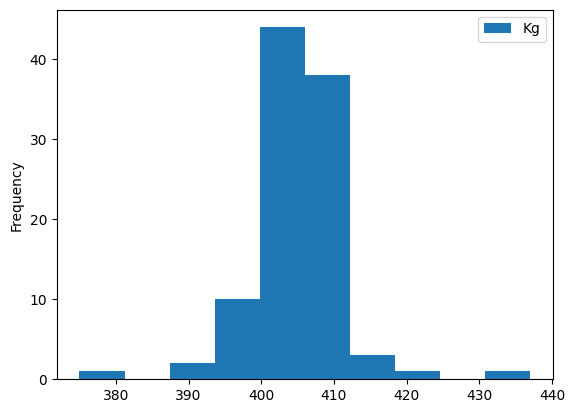

In [244]:
nb10.plot.hist()

<Axes: ylabel='Density'>

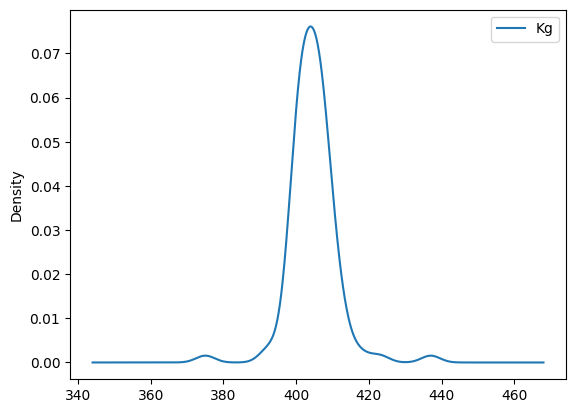

In [245]:
nb10.plot.density()

In [247]:
len(nb10[(nb10["Kg"]<=nb10["Kg"].mean()+nb10["Kg"].std())&(nb10["Kg"]>=nb10["Kg"].mean()-nb10["Kg"].std())])/len(nb10)

0.86

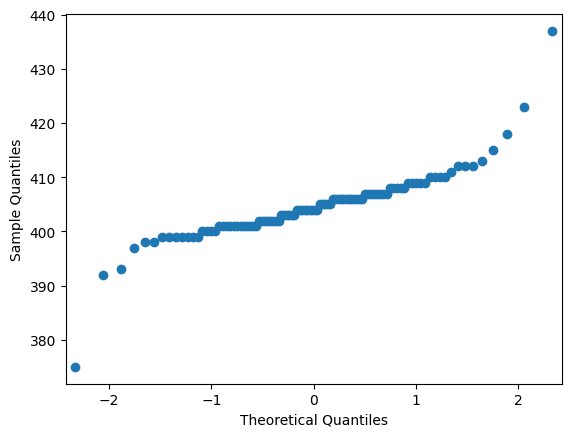

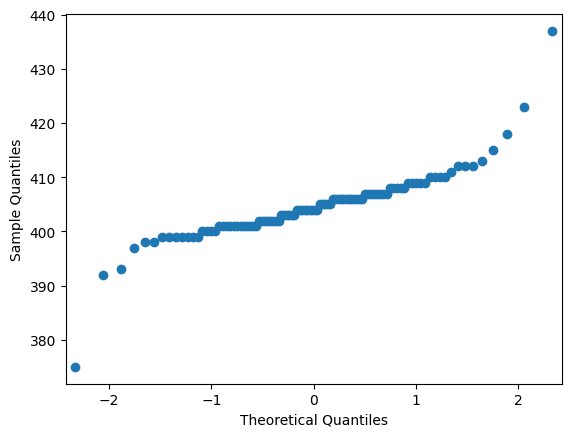

In [253]:
import statsmodels.api as sm
sm.qqplot(nb10["Kg"])

In [255]:
# analiza si es razonable pensar que la media es de 400kg tras eliminar los outliers
nb10 = nb10[abs(nb10["Kg"]-400)<20]

In [256]:
len(nb10[(nb10["Kg"]<=nb10["Kg"].mean()+nb10["Kg"].std())&(nb10["Kg"]>=nb10["Kg"].mean()-nb10["Kg"].std())])/len(nb10)

0.711340206185567

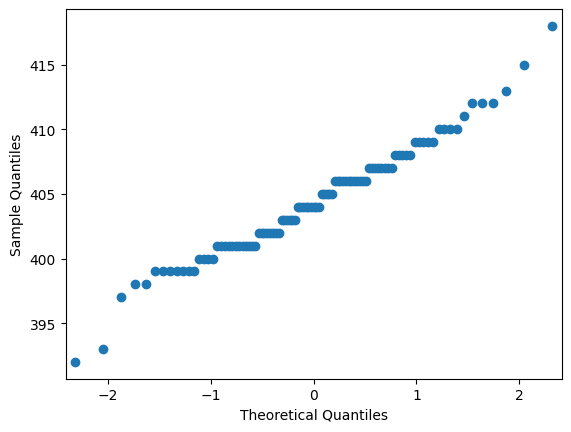

In [258]:
import statsmodels.api as sm
sm.qqplot(nb10["Kg"]);